In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 288)
pd.set_option('display.max_columns', 20)

#  <Center> Obtendo dados do lavat de 2014 a 2019 

In [57]:
#Planilhas Lavat
df=[]
df=pd.DataFrame(df)

nome_meses=['jan','fev','mar','abr','mai','jun','jul','ago','set','out','nov','dez']

for y in range (4,10): 
    for m in nome_meses:
        c=pd.read_excel(r'C:\Users\Katia Suely\Desktop\Planilhas do programa\201{}\201{}{}.xlsx'.format(y,y,m))
        df=df.append(c)
     
df.set_index('Unnamed: 0',inplace=True)
A=df.index 

In [58]:
#Equação do tempo 
T = np.pi/180                         #Transformação para radianos
 
sind=lambda a:np.sin(T*a)           
cosd=lambda a:np.cos(T*a)           
tand=lambda a:np.tan(T*a)           
acosd=lambda a:(1/T)*np.arccos(a)   
asind=lambda a:(1/T)*np.arcsin(a)   
atand=lambda a:(1/T)*np.arctan(a)
 
N = np.arange(1,366)
B = (N - 81)*360/364
 
ET =9.87*sind(2*B)-7.53*cosd(B)-1.5*sind(B)

In [59]:
#Declinação Solar
delta =23.45*sind((360/365*(284 + N)))

In [60]:
#Hora = np.arange(0,1.003,0.007)*24                # Usado para dados de 10 em 10 minutos  
HPL =np.arange(0,1440,10)                          # Horário Padrão Local (Horário do relógio)                   
HV = 0                                             # Horário de Verão (0 ou 60 minutos)
SL = 45                                            # Longitude Padrão Local
Long = 35.20298                                    # Longitude do Local (Natal-RN)
D = 1                                              # 0 para local a leste e 1 a oeste de Greenwich
TSA =  np.empty([365,144])    
#TSA_min =  np.empty([365,1441])     

if D==0:
    for i in range(365):
      for j in range(144):
        TSA[i][j] = HPL[j] + ET[i] - 4*(SL - Long) - HV
             
else:
    for i in range(365):
      for j in range(144): 
        TSA[i][j] = HPL[j] + ET[i] + 4*(SL - Long) - HV
           
            
TSA=TSA/60

In [61]:
h = (TSA - 12)*15

In [62]:
#Calculo do zenite

L = -5.8487   #Latitude Local
alfa=np.zeros([365,144])
zenite=np.zeros([365,144])
for i in range(0,365):
    for j in range(144):
          alfa[i][j]=asind(sind(L)*sind(delta[i])+cosd(L)*cosd(h[i,j])*cosd(delta[i])) 
                     
zenite=90-alfa

In [63]:
#Fórmula retirada do antigo código em scilab
Fotoperíodo=0.1333*acosd(-tand(L)*tand(delta))
foto=pd.DataFrame(Fotoperíodo)
foto['1']=Fotoperíodo
foto

foto=np.transpose(foto)

fotop=[]
fotop=pd.DataFrame(fotop)

for i in range (72):
    fotop=fotop.append(foto)
    
fotop=pd.melt(fotop)

fotop.drop('variable',axis=1,inplace=True)

In [64]:
H=df.SolarRad

In [65]:
H=pd.DataFrame(H)


In [66]:
df.shape

(315504, 4)

In [43]:
#Radiação extraterrestre 
Ho=np.zeros([365,144])
Io=1367
for i in range(365):
    for j in range(144):
          Ho[i][j]= Io*(1+0.033*np.cos(np.deg2rad(360*i)/365))*np.cos(np.deg2rad(zenite[i][j]))    
          if Ho[i][j]<0:
            Ho[i][j]=0          

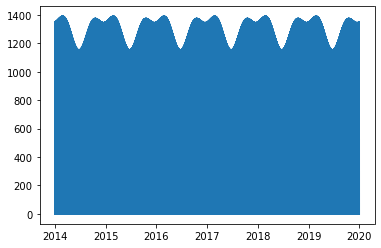

In [55]:
plt.plot(tabela.Ho)
plt.plot(tabela.H)
plt.gcf().set_size_inches(40, 10)

In [45]:
#Ho=np.transpose(Ho)
#Ho=pd.DataFrame(Ho)
#Ho=pd.melt(Ho)
#Ho.drop('variable',axis=1,inplace=True)
#Hodrop=Ho.drop([0,1,2,3,4,5],axis=0)

In [46]:
#Ho=Hodrop.append(Ho.append(Ho.append(Ho.append(Ho.append(Ho.append(Ho.loc[0:143]))))))

In [47]:
#Ho=Ho.append({'value':0}, ignore_index=True)
#Ho=Ho.append({'value':0}, ignore_index=True)
#Ho=Ho.append({'value':0}, ignore_index=True)
#Ho=Ho.append({'value':0}, ignore_index=True)
#Ho=Ho.append({'value':0}, ignore_index=True)
#Ho=Ho.append({'value':0}, ignore_index=True)

In [67]:
Ho.index=df.index

In [68]:
#Planilha de Ho e H
tabela=[]
tabela=pd.DataFrame(tabela)
tabela['H']=H.SolarRad
tabela['Ho']=Ho
tabela.Ho.replace(0,np.nan,inplace=True)
tabela['Hr']=tabela.H.values/tabela.Ho.values
tabela.head(288)

,H,Ho,Hr
Unnamed: 0,,,
2014-01-01 00:00:00,0.0,NaN,NaN
2014-01-01 00:10:00,0.0,NaN,NaN
2014-01-01 00:20:00,0.0,NaN,NaN
2014-01-01 00:30:00,0.0,NaN,NaN
2014-01-01 00:40:00,0.0,NaN,NaN
2014-01-01 00:50:00,0.0,NaN,NaN
2014-01-01 01:00:00,0.0,NaN,NaN
2014-01-01 01:10:00,0.0,NaN,NaN
2014-01-01 01:20:00,0.0,NaN,NaN


Text(0.5, 1.0, 'Comparação LAVAT e Extraterrestre')

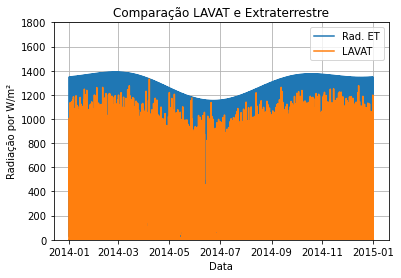

In [83]:
plt.plot(tabela.Ho.loc['2014'],label='Rad. ET')
plt.plot(tabela.H.loc['2014'],label='LAVAT')
plt.ylabel('Radiação por W/m²')
plt.legend(loc='upper right')
plt.xlabel('Data')
plt.grid()
plt.ylim([0,1800])
plt.title('Comparação LAVAT e Extraterrestre')

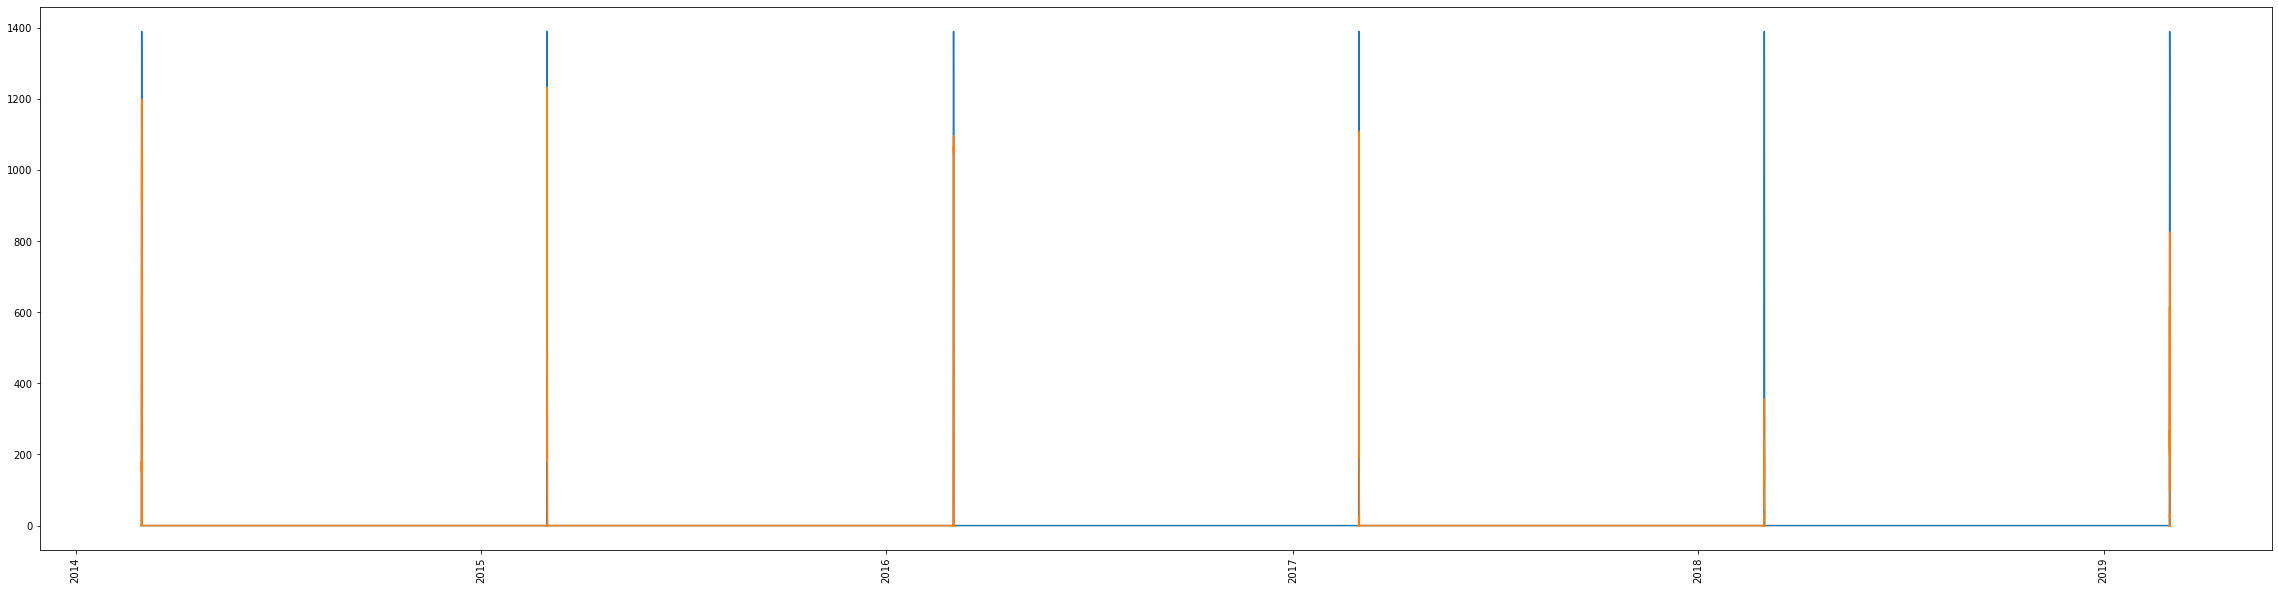

In [51]:
Ho.index=pd.to_datetime(Ho.index, format='%y-%m-%d %H:%M:%S')
plt.gcf().set_size_inches(40, 10)
plt.plot(Ho.loc[Ho.index.strftime("%m-%d") == "03-01"].index,Ho.loc[Ho.index.strftime("%m-%d") == "03-01"])
plt.plot(Ho.loc[Ho.index.strftime("%m-%d") == "03-01"].index,H.loc[H.index.strftime("%m-%d") == "03-01"])
plt.xticks( rotation=90 )
plt.show()

In [52]:
H.shape

(315504, 1)

In [53]:
Ho.shape

(315504, 1)

In [54]:
#Formula de  Ångström-Prescott regressão linear
#Result=H['Result']
#X=1/fotop.values
#Correlação=np.corrcoef(X,Result)
#from sklearn.linear_model import LinearRegression 
#regressor=LinearRegression().fit(X,Result)
#regressor.coef_
#regressor.intercept_ 
#plt.scatter(X,Result)
#plt.plot(X,regressor.predict(X),color='red')